Found 28 classes: ['ALIF', 'BAA', 'TA', 'THA', 'JEEM', 'HAA', 'KHAA', 'DELL', 'DHELL', 'RAA', 'ZAY', 'SEEN', 'SHEEN', 'SAD', 'DAD', 'TAA', 'DHAA', 'AYN', 'GHAYN', 'FAA', 'QAAF', 'KAAF', 'LAAM', 'MEEM', 'NOON', 'HA', 'WAW', 'YA']
Created directory: C:\Users\Fatima\a arsl\organized_by_class\ALIF
Created directory: C:\Users\Fatima\a arsl\organized_by_class\BAA
Created directory: C:\Users\Fatima\a arsl\organized_by_class\TA
Created directory: C:\Users\Fatima\a arsl\organized_by_class\THA
Created directory: C:\Users\Fatima\a arsl\organized_by_class\JEEM
Created directory: C:\Users\Fatima\a arsl\organized_by_class\HAA
Created directory: C:\Users\Fatima\a arsl\organized_by_class\KHAA
Created directory: C:\Users\Fatima\a arsl\organized_by_class\DELL
Created directory: C:\Users\Fatima\a arsl\organized_by_class\DHELL
Created directory: C:\Users\Fatima\a arsl\organized_by_class\RAA
Created directory: C:\Users\Fatima\a arsl\organized_by_class\ZAY
Created directory: C:\Users\Fatima\a arsl\organized

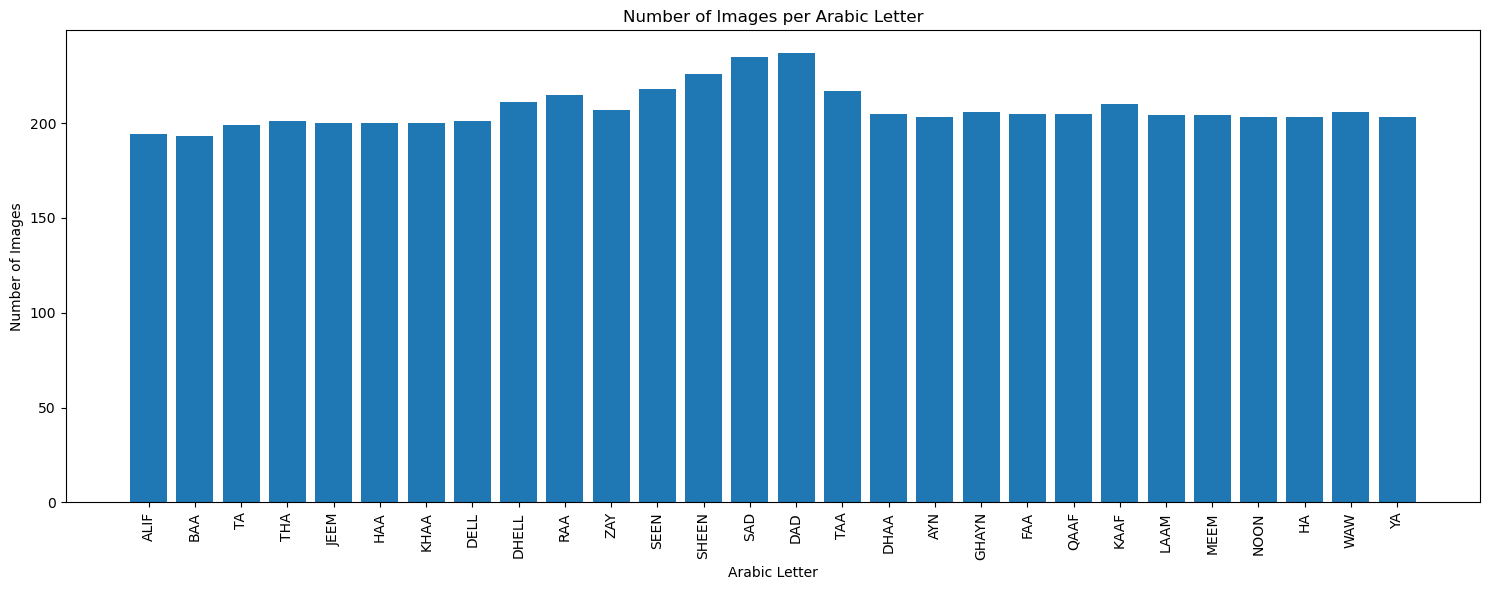

Sample images from each class:


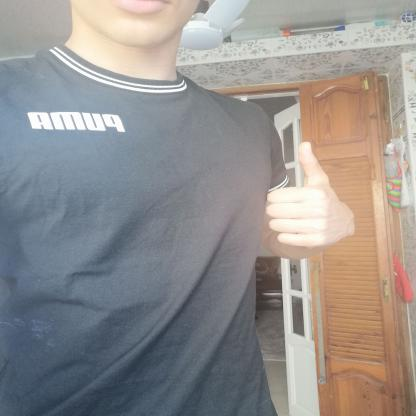

Class: ALIF


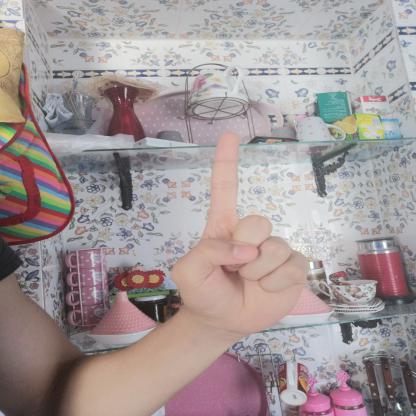

Class: BAA


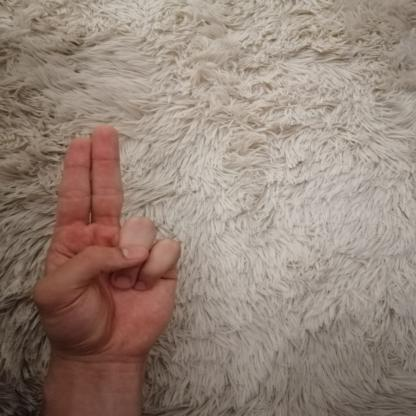

Class: TA


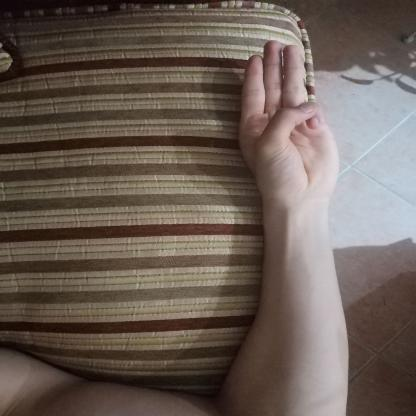

Class: THA


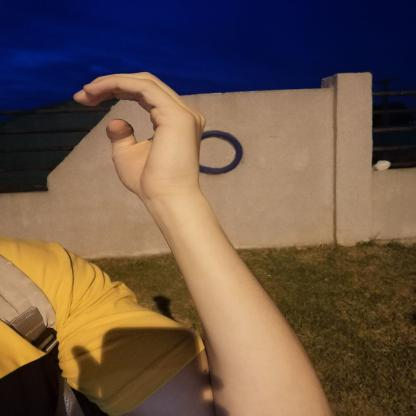

Class: JEEM


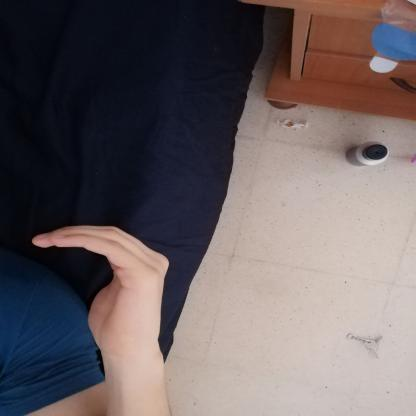

Class: HAA


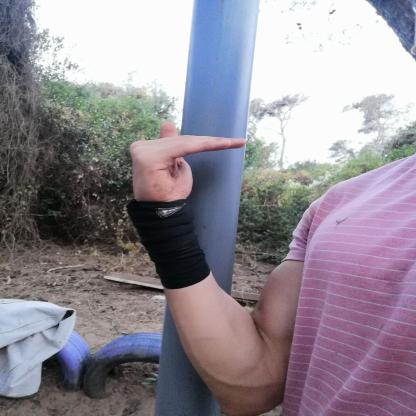

Class: KHAA


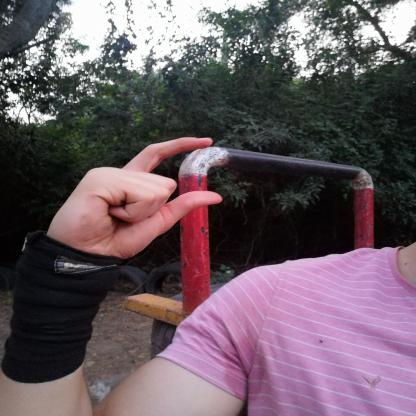

Class: DELL


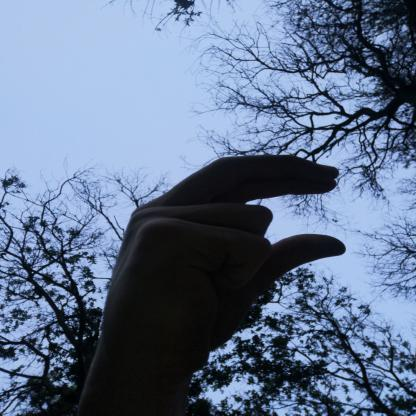

Class: DHELL


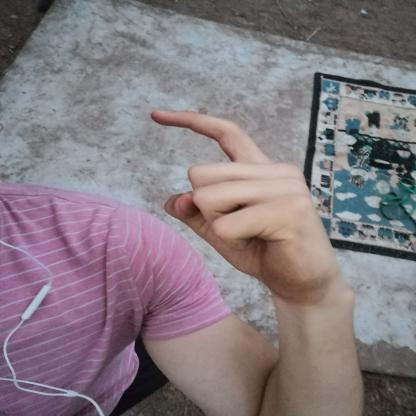

Class: RAA


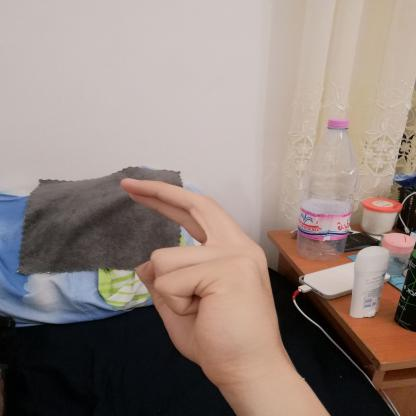

Class: ZAY


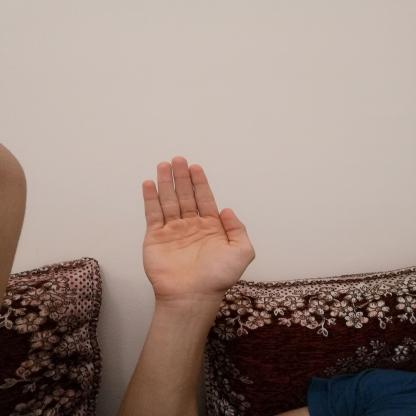

Class: SEEN


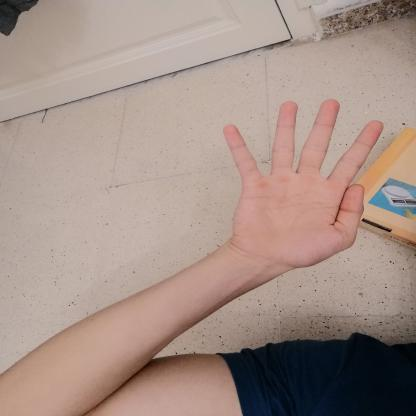

Class: SHEEN


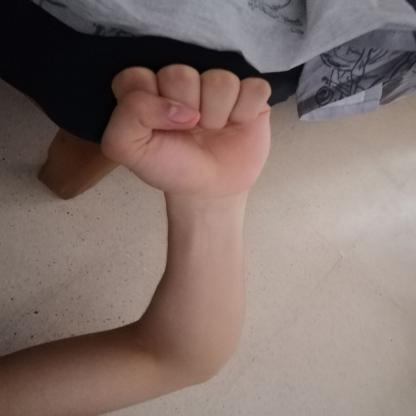

Class: SAD


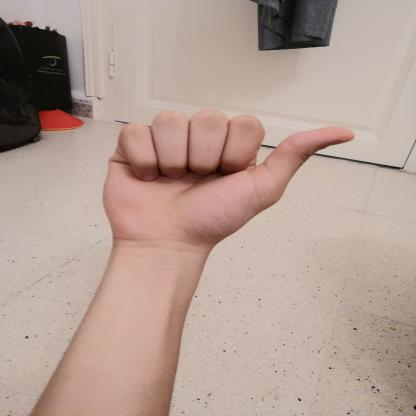

Class: DAD


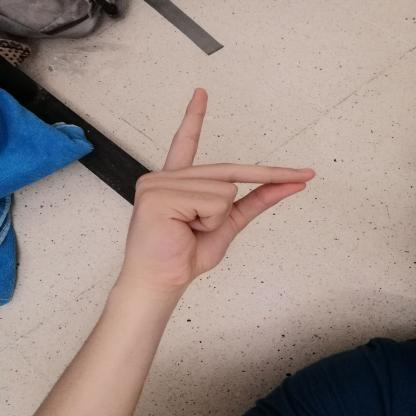

Class: TAA


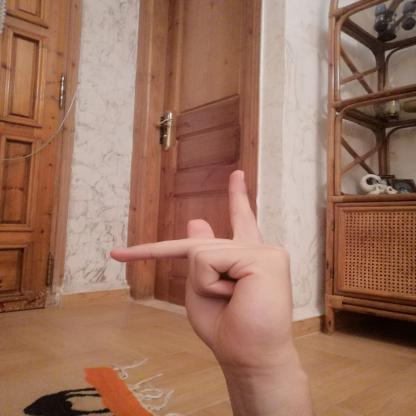

Class: DHAA


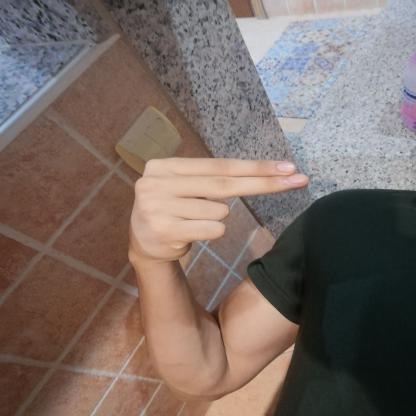

Class: AYN


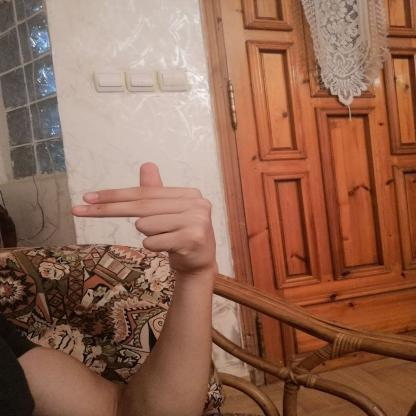

Class: GHAYN


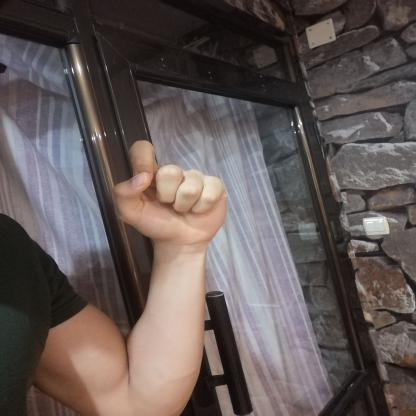

Class: FAA


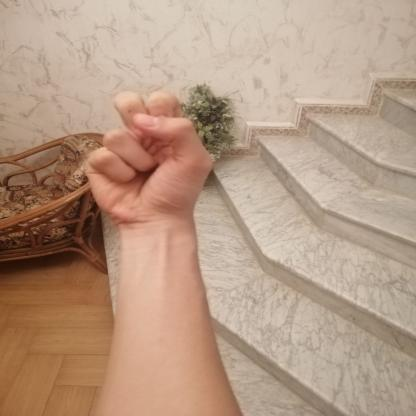

Class: QAAF


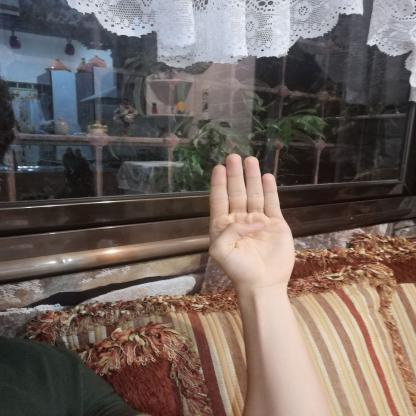

Class: KAAF


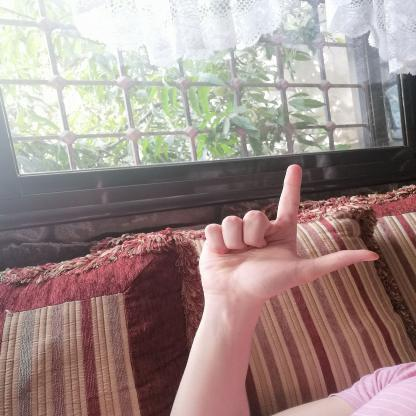

Class: LAAM


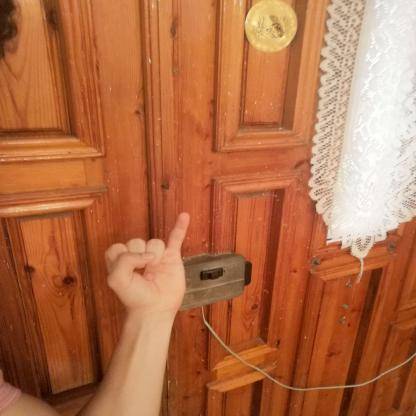

Class: MEEM


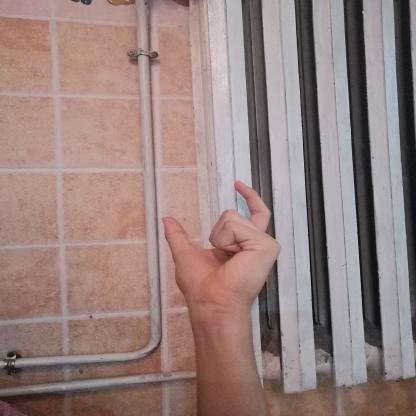

Class: NOON


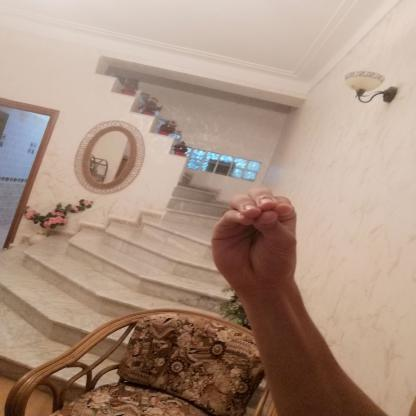

Class: HA


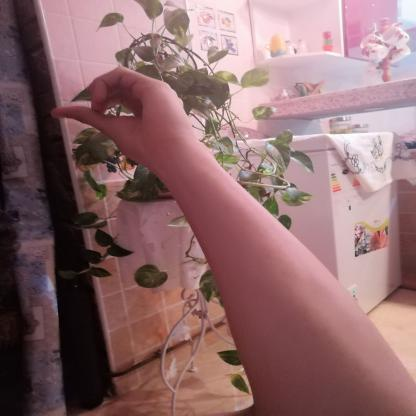

Class: WAW


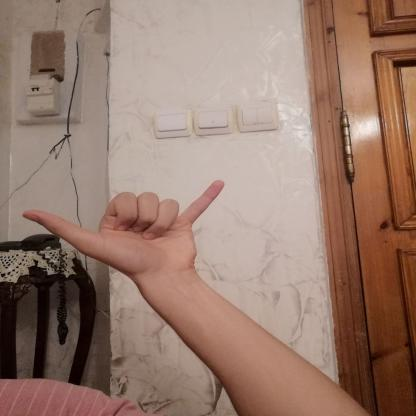

Class: YA


In [11]:
# Import necessary libraries
import os
import shutil
import yaml
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display, Image

# Use the specific path you requested
output_base = r"C:\Users\Fatima\a arsl\organized_by_class"
os.makedirs(output_base, exist_ok=True)

# Load class names from YAML file
yaml_path = r"C:/Users/Fatima/Downloads/archive (1)/unaugmented/416/data.yaml"

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)
    
class_names = data['names']
print(f"Found {len(class_names)} classes: {class_names}")

# Create directory for each class
for class_name in class_names:
    class_dir = os.path.join(output_base, class_name)
    os.makedirs(class_dir, exist_ok=True)
    print(f"Created directory: {class_dir}")

# Define the source directories
source_dirs = [
    r"C:/Users/Fatima/Downloads/archive (1)/unaugmented/416/train", 
    r"C:/Users/Fatima/Downloads/archive (1)/unaugmented/416/valid", 
    r"C:/Users/Fatima/Downloads/archive (1)/unaugmented/416/test"
]

# Process each source directory
images_processed = 0
for source_dir in source_dirs:
    images_dir = os.path.join(source_dir, "images")
    labels_dir = os.path.join(source_dir, "labels")
    
    if not os.path.exists(images_dir) or not os.path.exists(labels_dir):
        print(f"Warning: {images_dir} or {labels_dir} not found. Skipping.")
        continue
        
    print(f"Processing {source_dir}...")
    
    # Get all label files
    label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]
    
    for label_file in label_files:
        # Get corresponding image file name
        image_file_base = os.path.splitext(label_file)[0]
        
        # Find the actual image file (could be .jpg, .jpeg, .png, etc.)
        image_file = None
        for ext in ['.jpg', '.jpeg', '.png']:
            potential_file = image_file_base + ext
            if os.path.exists(os.path.join(images_dir, potential_file)):
                image_file = potential_file
                break
        
        if not image_file:
            continue
            
        # Read the label file to determine class
        label_path = os.path.join(labels_dir, label_file)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:  # Valid YOLO format
                    class_id = int(parts[0])
                    if 0 <= class_id < len(class_names):
                        class_name = class_names[class_id]
                        
                        # Copy image to class directory
                        source_image = os.path.join(images_dir, image_file)
                        target_dir = os.path.join(output_base, class_name)
                        
                        # Create a unique name to avoid overwriting
                        # Use a simplified filename to avoid path issues
                        dataset_type = os.path.basename(source_dir)  # 'train', 'valid', or 'test'
                        target_image = os.path.join(target_dir, f"{dataset_type}_{image_file}")
                        
                        # Copy the file
                        try:
                            shutil.copy2(source_image, target_image)
                            images_processed += 1
                            
                            # Show progress every 100 images
                            if images_processed % 100 == 0:
                                print(f"Processed {images_processed} images so far...")
                        except Exception as e:
                            print(f"Error copying {source_image} to {target_image}: {e}")
                        
                        # Only process first annotation for each image
                        break

print(f"Organization complete! Processed {images_processed} images in total.")

# Verification - check that files were actually copied
for class_name in class_names:
    class_dir = os.path.join(output_base, class_name)
    file_count = len(os.listdir(class_dir))
    print(f"Class {class_name}: {file_count} images")

# Visualization: Count images per class
class_counts = {}
for class_name in class_names:
    class_dir = os.path.join(output_base, class_name)
    count = len(os.listdir(class_dir))
    class_counts[class_name] = count

# Plot the distribution
plt.figure(figsize=(15, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title('Number of Images per Arabic Letter')
plt.xlabel('Arabic Letter')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

# Show a sample image from each class (only if images exist)
print("Sample images from each class:")
for class_name in class_names:
    class_dir = os.path.join(output_base, class_name)
    files = os.listdir(class_dir)
    if files:
        sample_img = os.path.join(class_dir, files[0])
        try:
            display(Image(filename=sample_img, width=200))
            print(f"Class: {class_name}")
        except Exception as e:
            print(f"Could not display image for {class_name}: {e}")

In [ ]:
import os
import pandas as pd
from collections import defaultdict

# Path to your organized directory
organized_dir = r"C:\Users\Fatima\a arsl\organized_by_class"

# Dictionary to store counts
dataset_counts = defaultdict(lambda: defaultdict(int))
total_counts = defaultdict(int)

# Check each class directory
for class_name in os.listdir(organized_dir):
    class_dir = os.path.join(organized_dir, class_name)
    
    if os.path.isdir(class_dir):
        # Count files from each dataset source
        train_count = len([f for f in os.listdir(class_dir) if f.startswith('train_')])
        valid_count = len([f for f in os.listdir(class_dir) if f.startswith('valid_')])
        test_count = len([f for f in os.listdir(class_dir) if f.startswith('test_')])
        
        # Store counts
        dataset_counts[class_name]['train'] = train_count
        dataset_counts[class_name]['valid'] = valid_count
        dataset_counts[class_name]['test'] = test_count
        
        # Calculate total
        total = train_count + valid_count + test_count
        total_counts[class_name] = total
        
        print(f"{class_name}: Train={train_count}, Valid={valid_count}, Test={test_count}, Total={total}")

# Create a DataFrame for better visualization
df = pd.DataFrame(dataset_counts).T
df['Total'] = df.sum(axis=1)
df.loc['Total'] = df.sum()

print("\nSummary Table:")
print(df)

# Check if any class is missing data from a particular dataset
missing = []
for class_name in dataset_counts:
    if dataset_counts[class_name]['train'] == 0:
        missing.append(f"{class_name} is missing train data")
    if dataset_counts[class_name]['valid'] == 0:
        missing.append(f"{class_name} is missing valid data")
    if dataset_counts[class_name]['test'] == 0:
        missing.append(f"{class_name} is missing test data")

if missing:
    print("\nMissing Data:")
    for msg in missing:
        print(f"- {msg}")
else:
    print("\nAll classes have data from all three datasets (train, valid, test).")